In [9]:
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
from scipy.special import zetac
from mpmath import zeta 
from matplotlib.lines import Line2D

def plot_rank_frequency(amount, xmin, xmax):
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    return ccdf
    
def calc_alpha(amount, size, xmin, xmax):
    alpha = 1 + len(amount[xmin:xmax]) / (np.sum(np.log(amount[xmin:xmax]/ (np.min(amount[xmin:xmax]) - 0.5))))
    xmin2 = size[xmin]
    invSigma = np.sqrt(len(amount[xmin:xmax]) * ( (zeta(alpha, xmin2, 2)/zeta(alpha, xmin2)) - (zeta(alpha, xmin2, 1)/zeta(alpha,xmin2))**2 ))
    sigma = 1/invSigma
    return [alpha, sigma]



OSError: Pref_attach/Choice_true/r50_2D_c0.30_100_100000_0.300000_1.txt not found.

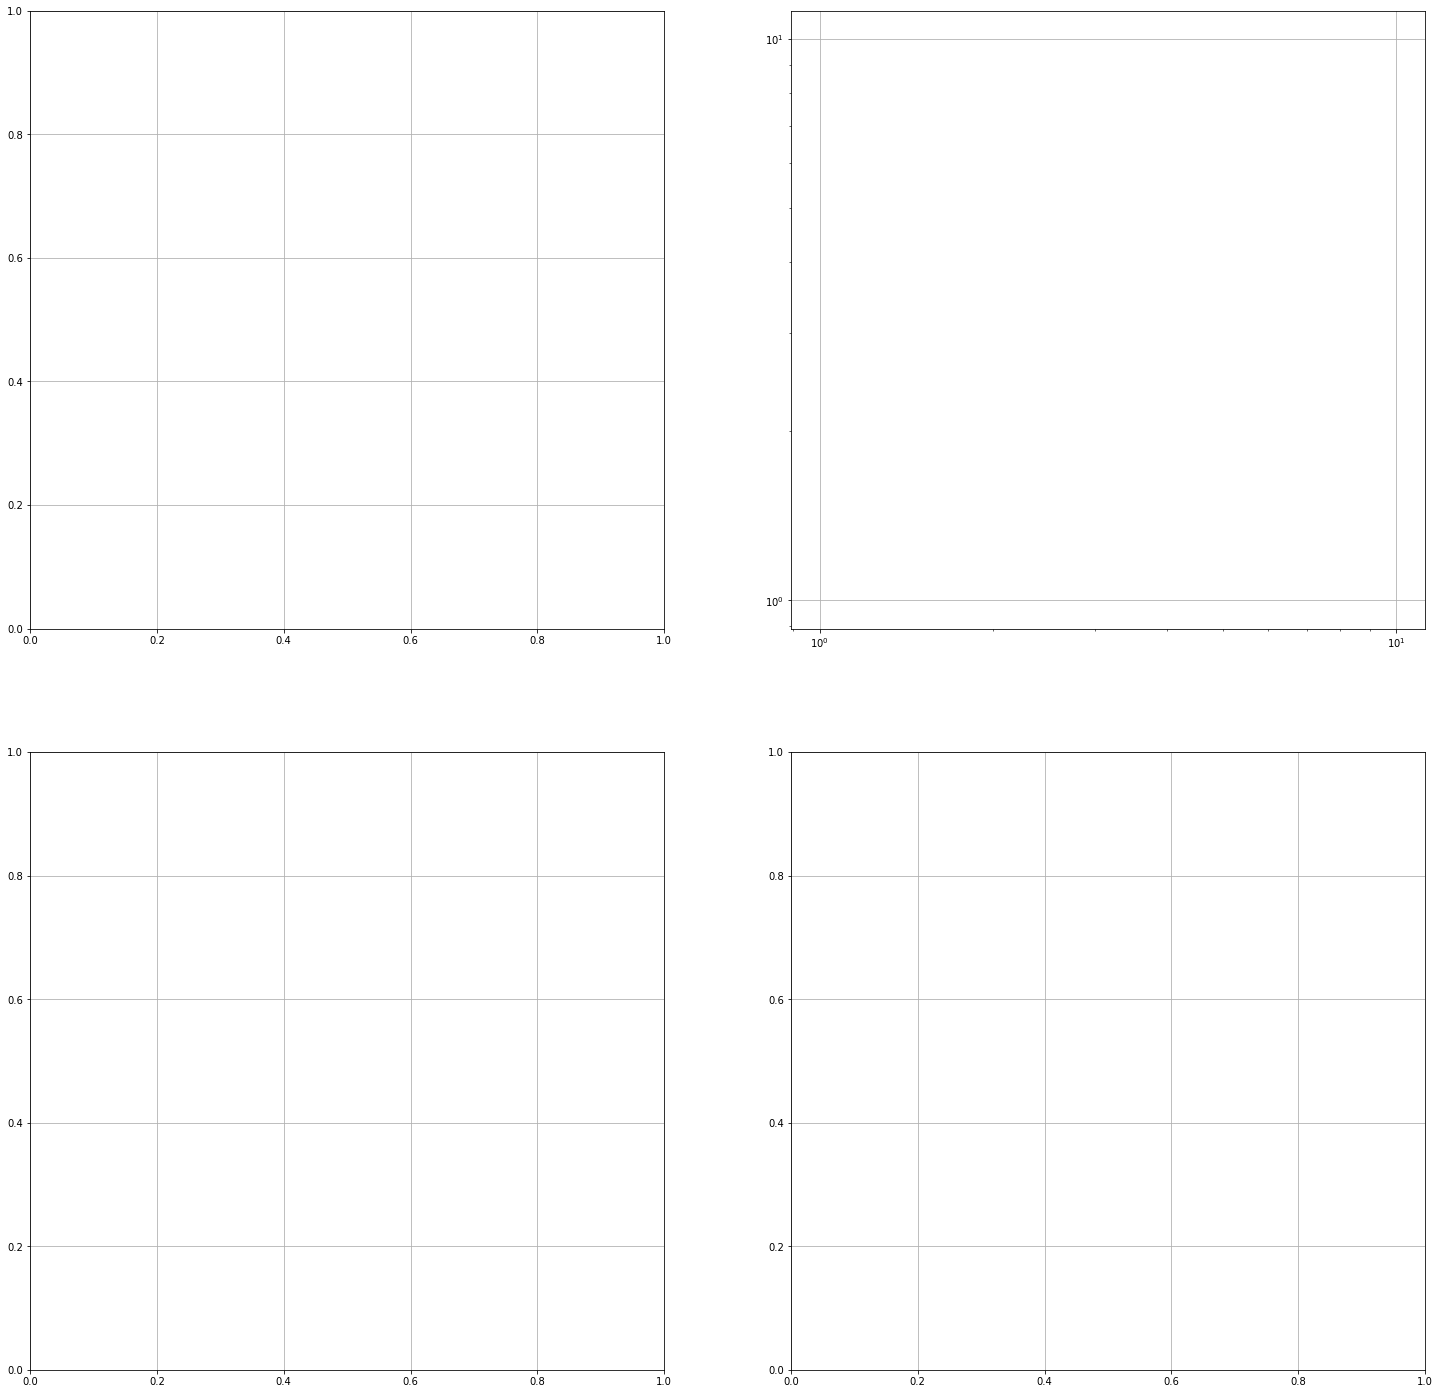

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(25, 25))
name = [100000, 400000, 800000]



def plot_rank_frequency(amount, xmin, xmax):
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    return ccdf
    
def calc_alpha(amount, size, xmin, xmax):
    alpha = 1 + len(amount[xmin:xmax]) / (np.sum(np.log(amount[xmin:xmax]/ (np.min(amount[xmin:xmax]) - 0.5))))
    xmin2 = size[xmin]
    invSigma = np.sqrt(len(amount[xmin:xmax]) * ( (zeta(alpha, xmin2, 2)/zeta(alpha, xmin2)) - (zeta(alpha, xmin2, 1)/zeta(alpha,xmin2))**2 ))
    sigma = 1/invSigma
    return [alpha, sigma]
upper_lim = [11] * len(name)
lower_lim = [1] * len(name)


upper_lim2 = [-1] * len(name)

ax[0, 0].grid()
ax[0, 1].grid()
ax[1,0].grid()
ax[1,1].grid()


ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')

cmap = plt.get_cmap('tab10')
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/Choice_true/r50_2D_c0.30_100_{}_0.300000_1.txt".format(name[i]), skiprows=2, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 0].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))

    
    lower_lim2 =  [-int(0.6 * len(amount))] * len(name)
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    ax[0, 1].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
    ax[0, 1].plot(ranks, ccdf, c=cmap(i))

    ax[1, 0].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
    ax[1, 0].plot(ranks, ccdf, c=cmap(i))

    lower_lim = 0
    upper_lim = int(10**( (np.log10(len(amount))/3)))
    lower_lim2 = int(10**( 2*(np.log10(len(amount))/3)))
    upper_lim2 = -1
    print(int(10**( (np.log10(len(amount))/3))))

    out = calc_alpha(amount, size, lower_lim, upper_lim)
    out2 = calc_alpha(amount, size, upper_lim, lower_lim2)
    out3 = calc_alpha(amount, size, lower_lim2, upper_lim2)
    out4 = calc_alpha(amount, size, 0, -1)
    ax[1,1].errorbar(name[i], out[0], yerr=out[1], fmt='v', c=cmap(i))
    ax[1,1].errorbar(name[i], out2[0], yerr=out2[1], fmt='D', c=cmap(i))
    ax[1,1].errorbar(name[i], out3[0], yerr=out3[1], fmt='^', c=cmap(i))
    ax[1,1].errorbar(name[i], out4[0], yerr=out4[1], fmt='o', c=cmap(i))
    ax[1,1].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    

ax[0,0].set_xlabel("Cluster size")
ax[0,0].set_ylabel("Amount")
ax[0,0].set_title("Cluster size distribution: r=50, Density=0.3, Iterations=500")
ax[0,0].legend()

ax[1,1].set_xlabel("Steps", fontsize=12)
ax[1,1].set_ylabel("Alpha", fontsize=12)

ax[1,1].set_title("Alpha as function of steps", fontsize=12)

ax[0,1].set_xlabel("Rank")
ax[0,1].set_ylabel("Amount")

ax[0,0].set_xlim(1, 1000)

ax[1,0].set_xlabel("Rank", fontsize=12)
ax[1,0].set_ylabel("Amount", fontsize=12)
ax[1,0].set_title("CCDF: r=50, Density=0.3, Iterations=500", fontsize=12)
ax[1, 0].legend()


ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')

ax[1,1].set_ylim(0, 5)


# Set the y-ticks to appear every 0.5 units
ax[1, 1].set_yticks(np.arange(0, 5, 0.5))  # replace 5 with max y-value



6
5
5
5
5


/tmp/ipykernel_6159/965243227.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[0, 1].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
/tmp/ipykernel_6159/965243227.py:46: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[1, 0].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')


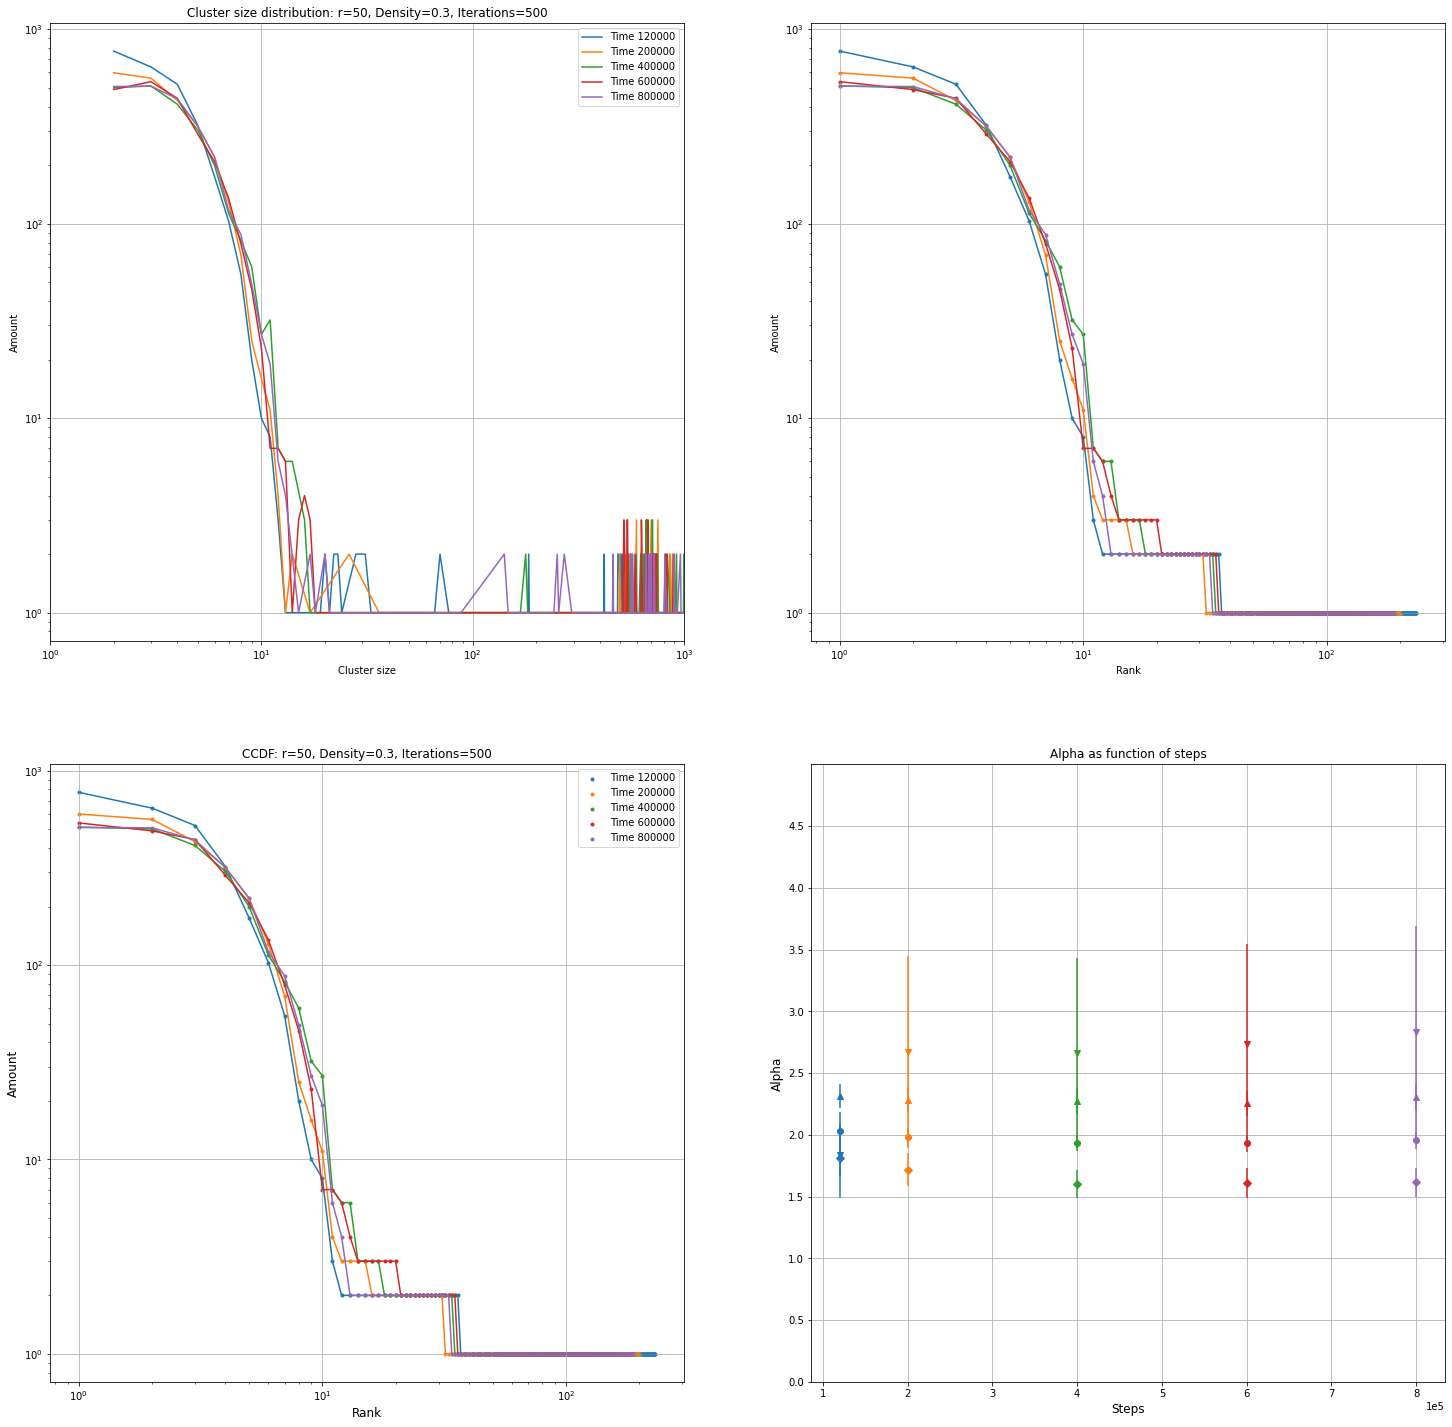

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(25, 25))
name = [120000, 400000, 800000]



def plot_rank_frequency(amount, xmin, xmax):
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    return ccdf
    
def calc_alpha(amount, size, xmin, xmax):
    alpha = 1 + len(amount[xmin:xmax]) / (np.sum(np.log(amount[xmin:xmax]/ (np.min(amount[xmin:xmax]) - 0.5))))
    xmin2 = size[xmin]
    invSigma = np.sqrt(len(amount[xmin:xmax]) * ( (zeta(alpha, xmin2, 2)/zeta(alpha, xmin2)) - (zeta(alpha, xmin2, 1)/zeta(alpha,xmin2))**2 ))
    sigma = 1/invSigma
    return [alpha, sigma]
upper_lim = [11] * len(name)
lower_lim = [1] * len(name)


upper_lim2 = [-1] * len(name)

ax[0, 0].grid()
ax[0, 1].grid()
ax[1,0].grid()
ax[1,1].grid()


ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')

cmap = plt.get_cmap('tab10')
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/Choice_true/r50_2D_0.05/r50_2D_c0.05_100_{}_0.300000_1.txt".format(name[i]), skiprows=2, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 0].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))

    
    lower_lim2 =  [-int(0.6 * len(amount))] * len(name)
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    ax[0, 1].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
    ax[0, 1].plot(ranks, ccdf, c=cmap(i))

    ax[1, 0].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
    ax[1, 0].plot(ranks, ccdf, c=cmap(i))

    lower_lim = 0
    upper_lim = int(10**( (np.log10(len(amount))/3)))
    lower_lim2 = int(10**( 2*(np.log10(len(amount))/3)))
    upper_lim2 = -1
    print(int(10**( (np.log10(len(amount))/3))))

    out = calc_alpha(amount, size, lower_lim, upper_lim)
    out2 = calc_alpha(amount, size, upper_lim, lower_lim2)
    out3 = calc_alpha(amount, size, lower_lim2, upper_lim2)
    out4 = calc_alpha(amount, size, 0, -1)
    ax[1,1].errorbar(name[i], out[0], yerr=out[1], fmt='v', c=cmap(i))
    ax[1,1].errorbar(name[i], out2[0], yerr=out2[1], fmt='D', c=cmap(i))
    ax[1,1].errorbar(name[i], out3[0], yerr=out3[1], fmt='^', c=cmap(i))
    ax[1,1].errorbar(name[i], out4[0], yerr=out4[1], fmt='o', c=cmap(i))
    ax[1,1].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    

ax[0,0].set_xlabel("Cluster size")
ax[0,0].set_ylabel("Amount")
ax[0,0].set_title("Cluster size distribution: r=50, Density=0.3, Iterations=500")
ax[0,0].legend()

ax[1,1].set_xlabel("Steps", fontsize=12)
ax[1,1].set_ylabel("Alpha", fontsize=12)

ax[1,1].set_title("Alpha as function of steps", fontsize=12)

ax[0,1].set_xlabel("Rank")
ax[0,1].set_ylabel("Amount")

ax[0,0].set_xlim(1, 1000)

ax[1,0].set_xlabel("Rank", fontsize=12)
ax[1,0].set_ylabel("Amount", fontsize=12)
ax[1,0].set_title("CCDF: r=50, Density=0.3, Iterations=500", fontsize=12)
ax[1, 0].legend()


ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')

ax[1,1].set_ylim(0, 5)


# Set the y-ticks to appear every 0.5 units
ax[1, 1].set_yticks(np.arange(0, 5, 0.5))  # replace 5 with max y-value



2
3
5
6
6
6
6
6


/tmp/ipykernel_5287/4053456240.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[0, 1].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
/tmp/ipykernel_5287/4053456240.py:46: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[1, 0].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')


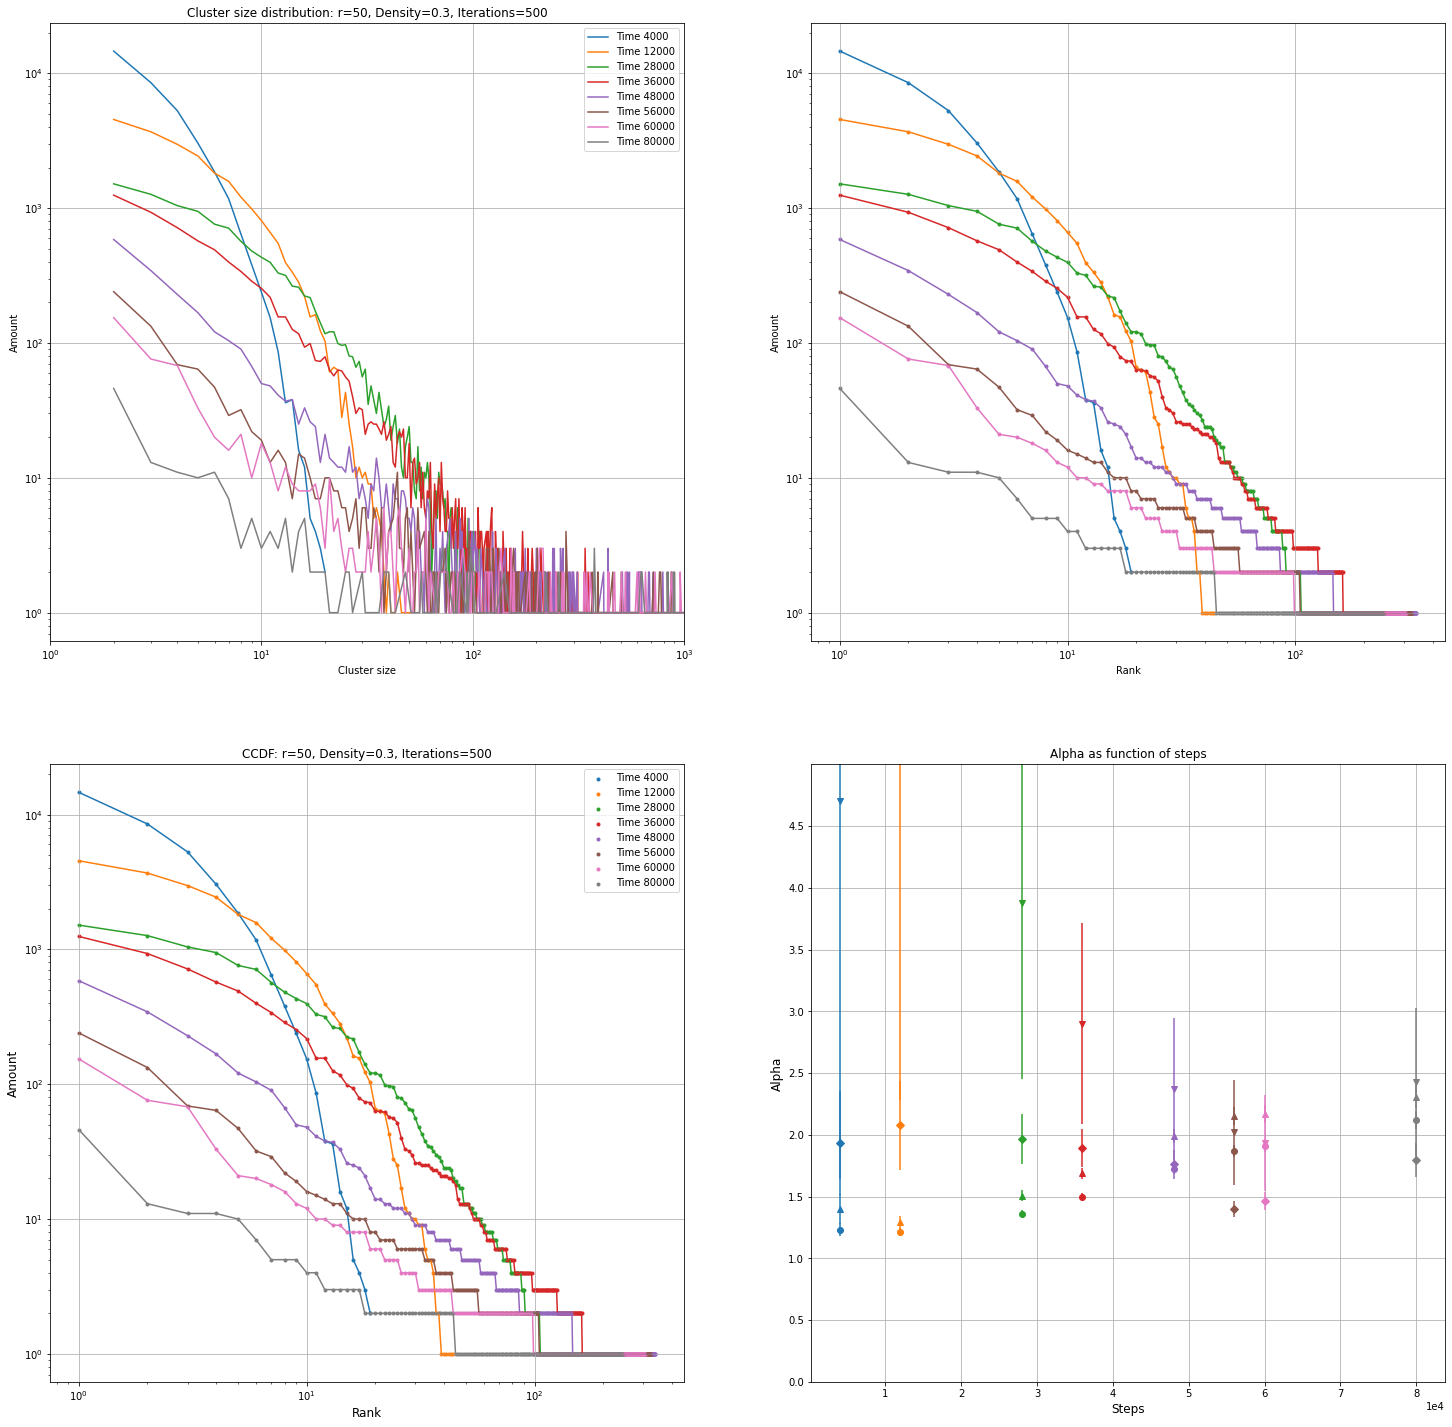

In [3]:
fig, ax = plt.subplots(2, 2, figsize=(25, 25))
name = [4000, 12000, 28000, 36000, 48000, 56000, 60000, 80000]



def plot_rank_frequency(amount, xmin, xmax):
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    return ccdf
    
def calc_alpha(amount, size, xmin, xmax):
    alpha = 1 + len(amount[xmin:xmax]) / (np.sum(np.log(amount[xmin:xmax]/ (np.min(amount[xmin:xmax]) - 0.5))))
    xmin2 = size[xmin]
    invSigma = np.sqrt(len(amount[xmin:xmax]) * ( (zeta(alpha, xmin2, 2)/zeta(alpha, xmin2)) - (zeta(alpha, xmin2, 1)/zeta(alpha,xmin2))**2 ))
    sigma = 1/invSigma
    return [alpha, sigma]
upper_lim = [11] * len(name)
lower_lim = [1] * len(name)


upper_lim2 = [-1] * len(name)

ax[0, 0].grid()
ax[0, 1].grid()
ax[1,0].grid()
ax[1,1].grid()


ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')

cmap = plt.get_cmap('tab10')
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/Choice_true/r50_2D_0.001/r50_2D_c0.00_100_{}_0.300000_1.txt".format(name[i]), skiprows=2, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 0].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))

    
    lower_lim2 =  [-int(0.6 * len(amount))] * len(name)
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    ax[0, 1].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
    ax[0, 1].plot(ranks, ccdf, c=cmap(i))

    ax[1, 0].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
    ax[1, 0].plot(ranks, ccdf, c=cmap(i))

    lower_lim = 0
    upper_lim = int(10**( (np.log10(len(amount))/3)))
    lower_lim2 = int(10**( 2*(np.log10(len(amount))/3)))
    upper_lim2 = -1
    print(int(10**( (np.log10(len(amount))/3))))

    out = calc_alpha(amount, size, lower_lim, upper_lim)
    out2 = calc_alpha(amount, size, upper_lim, lower_lim2)
    out3 = calc_alpha(amount, size, lower_lim2, upper_lim2)
    out4 = calc_alpha(amount, size, 0, -1)
    ax[1,1].errorbar(name[i], out[0], yerr=out[1], fmt='v', c=cmap(i))
    ax[1,1].errorbar(name[i], out2[0], yerr=out2[1], fmt='D', c=cmap(i))
    ax[1,1].errorbar(name[i], out3[0], yerr=out3[1], fmt='^', c=cmap(i))
    ax[1,1].errorbar(name[i], out4[0], yerr=out4[1], fmt='o', c=cmap(i))
    ax[1,1].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    

ax[0,0].set_xlabel("Cluster size")
ax[0,0].set_ylabel("Amount")
ax[0,0].set_title("Cluster size distribution: r=50, Density=0.3, Iterations=500")
ax[0,0].legend()

ax[1,1].set_xlabel("Steps", fontsize=12)
ax[1,1].set_ylabel("Alpha", fontsize=12)

ax[1,1].set_title("Alpha as function of steps", fontsize=12)

ax[0,1].set_xlabel("Rank")
ax[0,1].set_ylabel("Amount")

ax[0,0].set_xlim(1, 1000)

ax[1,0].set_xlabel("Rank", fontsize=12)
ax[1,0].set_ylabel("Amount", fontsize=12)
ax[1,0].set_title("CCDF: r=50, Density=0.3, Iterations=500", fontsize=12)
ax[1, 0].legend()


ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')

ax[1,1].set_ylim(0, 5)


# Set the y-ticks to appear every 0.5 units
ax[1, 1].set_yticks(np.arange(0, 5, 0.5))  # replace 5 with max y-value



/tmp/ipykernel_6159/3441106227.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[0, 1].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
/tmp/ipykernel_6159/3441106227.py:46: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[1, 0].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')


2
3
4
5
6
6
6
6
6
6
6


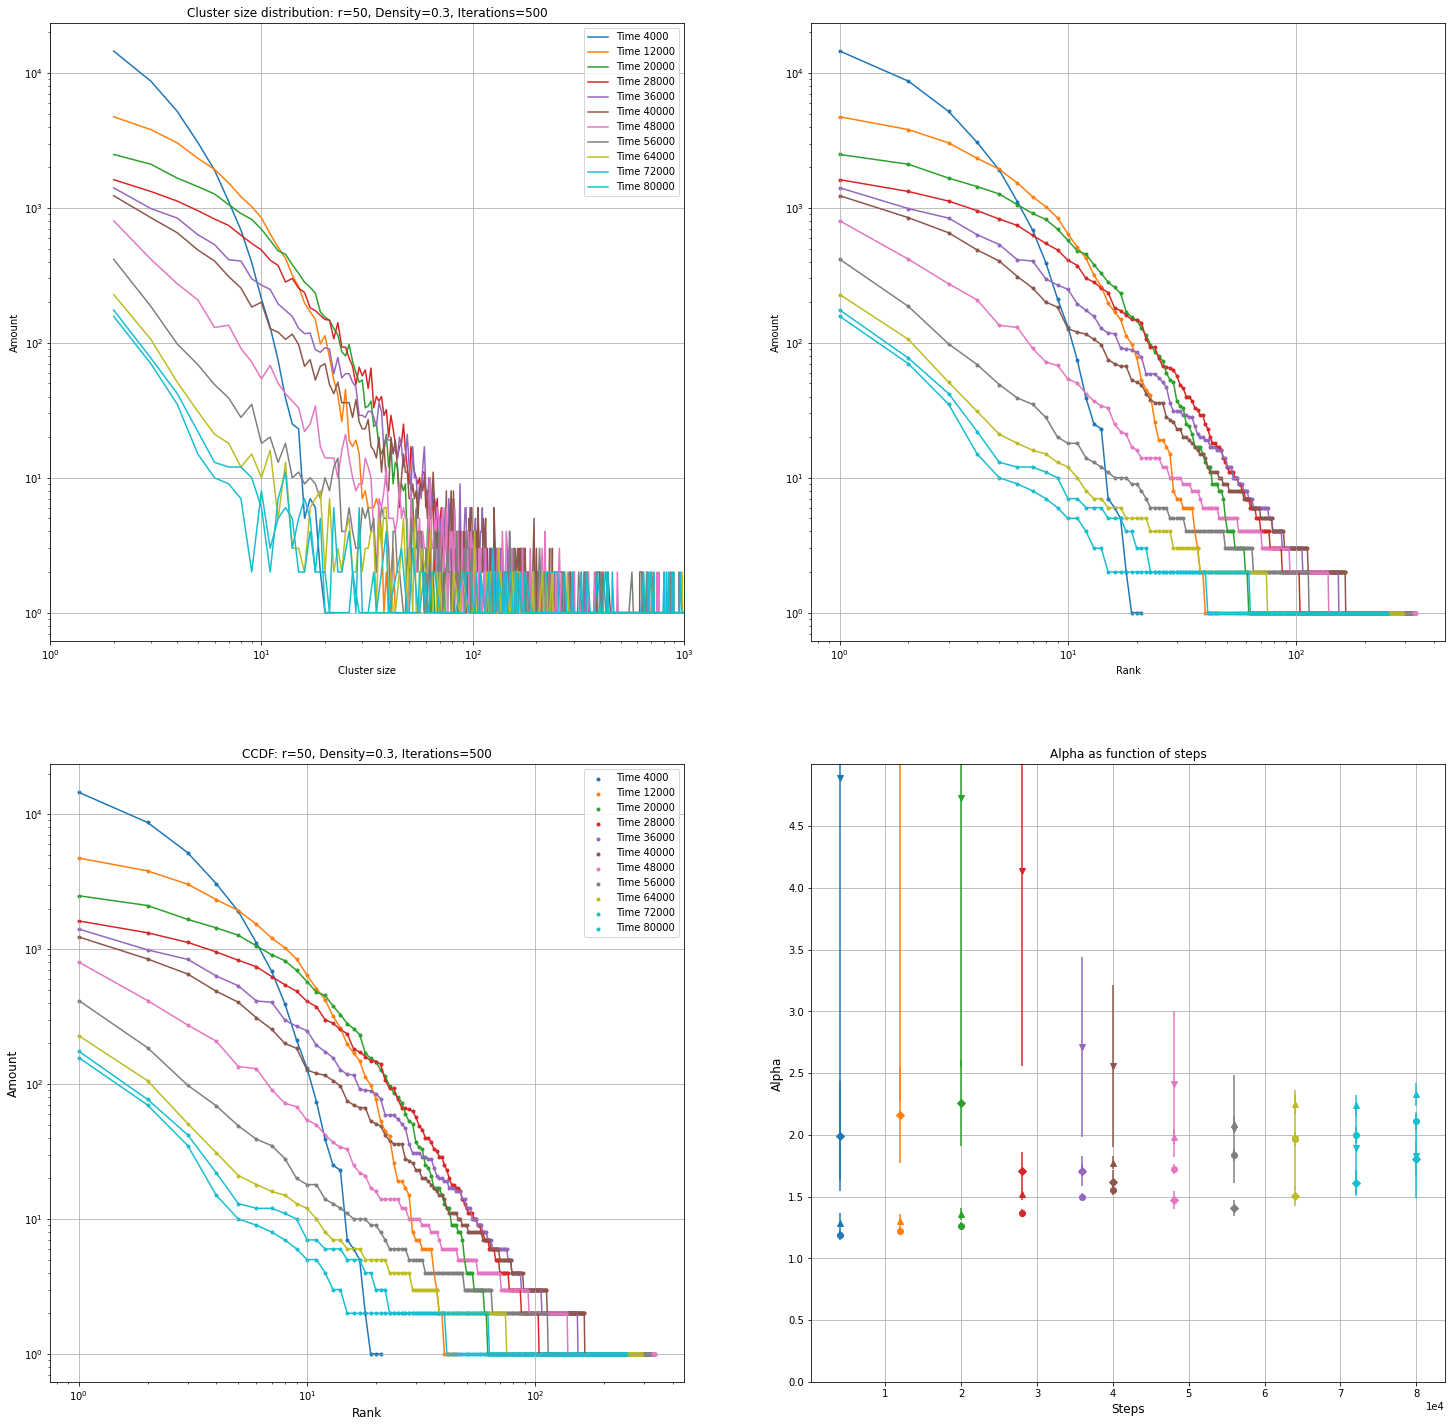

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(25, 25))
name = [4000, 20000, 36000, 48000, 64000, 80000]



def plot_rank_frequency(amount, xmin, xmax):
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    return ccdf
    
def calc_alpha(amount, size, xmin, xmax):
    alpha = 1 + len(amount[xmin:xmax]) / (np.sum(np.log(amount[xmin:xmax]/ (np.min(amount[xmin:xmax]) - 0.5))))
    xmin2 = size[xmin]
    invSigma = np.sqrt(len(amount[xmin:xmax]) * ( (zeta(alpha, xmin2, 2)/zeta(alpha, xmin2)) - (zeta(alpha, xmin2, 1)/zeta(alpha,xmin2))**2 ))
    sigma = 1/invSigma
    return [alpha, sigma]
upper_lim = [11] * len(name)
lower_lim = [1] * len(name)


upper_lim2 = [-1] * len(name)

ax[0, 0].grid()
ax[0, 1].grid()
ax[1,0].grid()
ax[1,1].grid()


ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')

cmap = plt.get_cmap('tab10')
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/Choice_true/0.005/r50_2D_c0.00500_100_{}_0.300000_1.txt".format(name[i]), skiprows=2, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 0].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))

    
    lower_lim2 =  [-int(0.6 * len(amount))] * len(name)
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    ax[0, 1].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
    ax[0, 1].plot(ranks, ccdf, c=cmap(i))

    ax[1, 0].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
    ax[1, 0].plot(ranks, ccdf, c=cmap(i))

    lower_lim = 0
    upper_lim = int(10**( (np.log10(len(amount))/3)))
    lower_lim2 = int(10**( 2*(np.log10(len(amount))/3)))
    upper_lim2 = -1
    print(int(10**( (np.log10(len(amount))/3))))

    out = calc_alpha(amount, size, lower_lim, upper_lim)
    out2 = calc_alpha(amount, size, upper_lim, lower_lim2)
    out3 = calc_alpha(amount, size, lower_lim2, upper_lim2)
    out4 = calc_alpha(amount, size, 0, -1)
    ax[1,1].errorbar(name[i], out[0], yerr=out[1], fmt='v', c=cmap(i))
    ax[1,1].errorbar(name[i], out2[0], yerr=out2[1], fmt='D', c=cmap(i))
    ax[1,1].errorbar(name[i], out3[0], yerr=out3[1], fmt='^', c=cmap(i))
    ax[1,1].errorbar(name[i], out4[0], yerr=out4[1], fmt='o', c=cmap(i))
    ax[1,1].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    

ax[0,0].set_xlabel("Cluster size")
ax[0,0].set_ylabel("Amount")
ax[0,0].set_title("Cluster size distribution: r=50, Density=0.3, Iterations=500")
ax[0,0].legend()

ax[1,1].set_xlabel("Steps", fontsize=12)
ax[1,1].set_ylabel("Alpha", fontsize=12)

ax[1,1].set_title("Alpha as function of steps", fontsize=12)

ax[0,1].set_xlabel("Rank")
ax[0,1].set_ylabel("Amount")

ax[0,0].set_xlim(1, 1000)

ax[1,0].set_xlabel("Rank", fontsize=12)
ax[1,0].set_ylabel("Amount", fontsize=12)
ax[1,0].set_title("CCDF: r=50, Density=0.3, Iterations=500", fontsize=12)
ax[1, 0].legend()


ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')

ax[1,1].set_ylim(0, 5)


# Set the y-ticks to appear every 0.5 units
ax[1, 1].set_yticks(np.arange(0, 5, 0.5))  # replace 5 with max y-value



/tmp/ipykernel_5675/3535433289.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[0, 1].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
/tmp/ipykernel_5675/3535433289.py:46: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[1, 0].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')


2
3
4
5
6
6
6
6
6
6
6


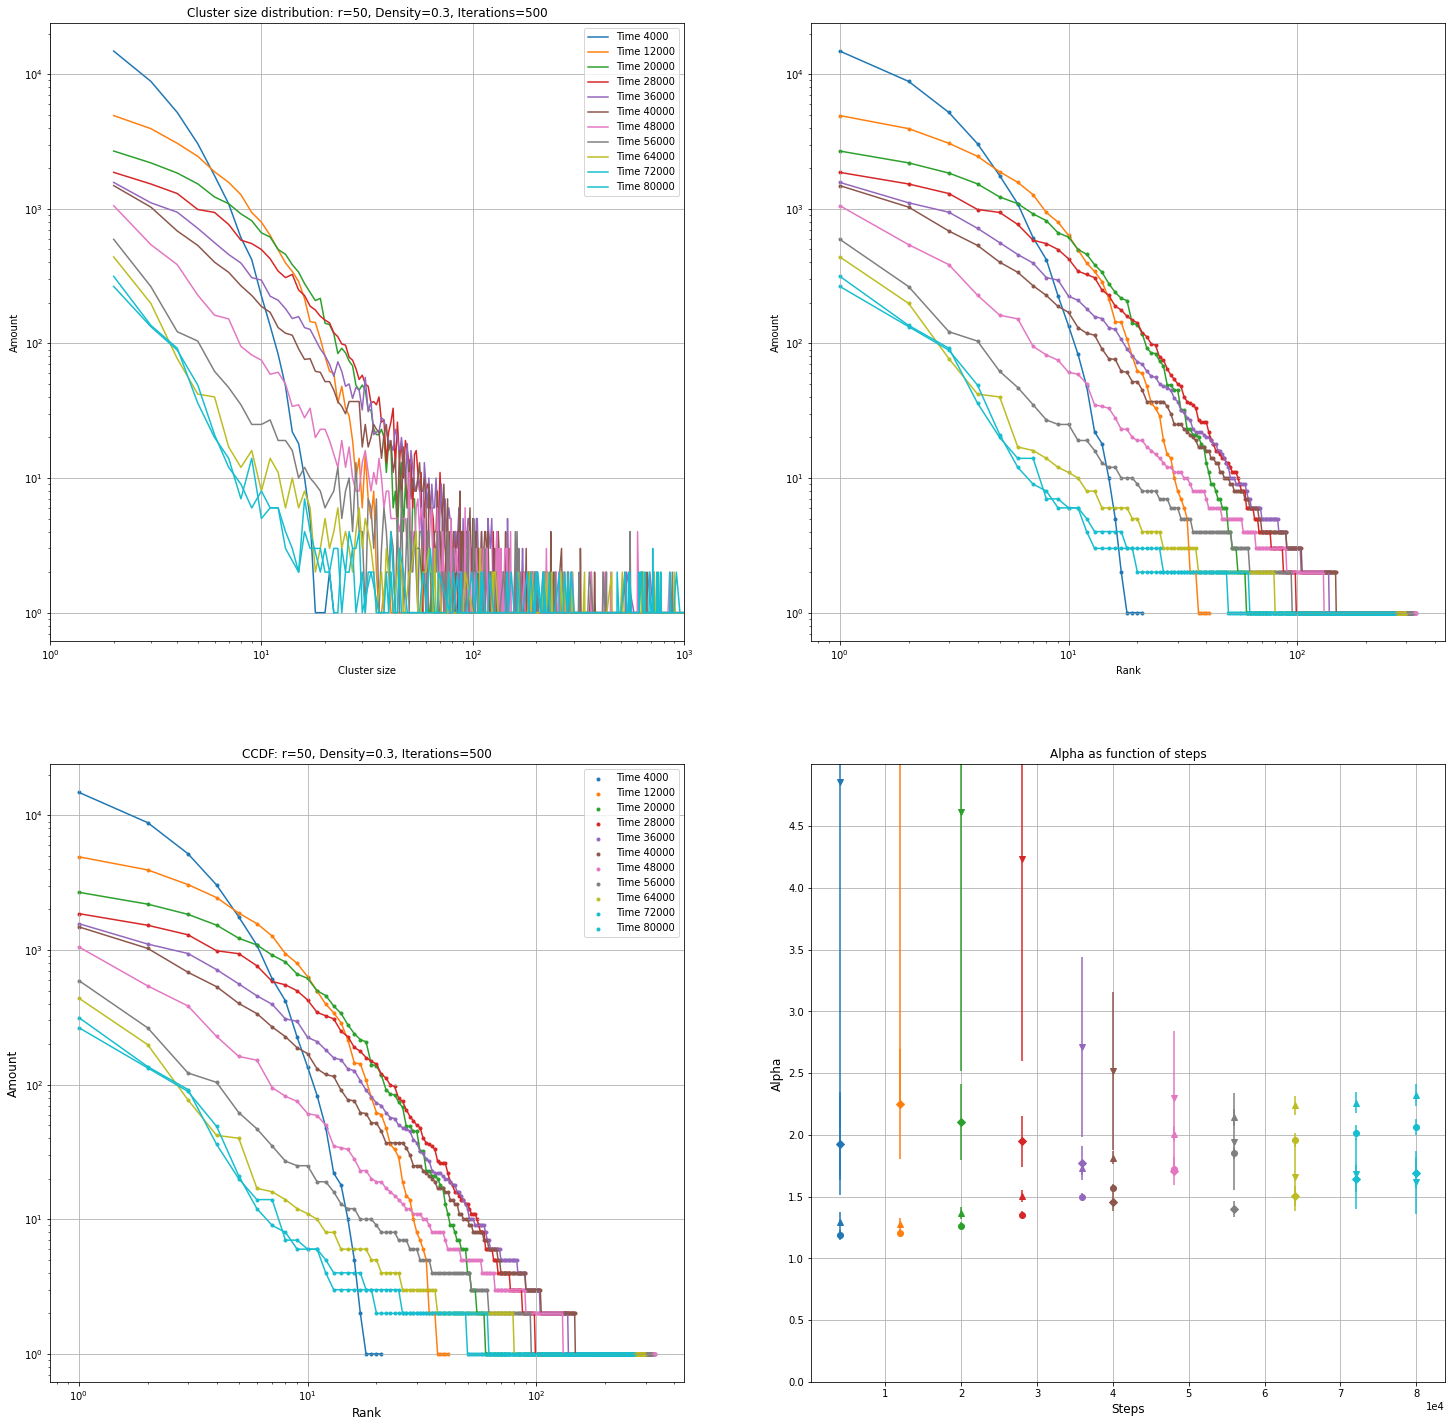

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(25, 25))
name = [4000, 20000, 36000, 48000, 64000, 80000]


def plot_rank_frequency(amount, xmin, xmax):
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    return ccdf
    
def calc_alpha(amount, size, xmin, xmax):
    alpha = 1 + len(amount[xmin:xmax]) / (np.sum(np.log(amount[xmin:xmax]/ (np.min(amount[xmin:xmax]) - 0.5))))
    xmin2 = size[xmin]
    invSigma = np.sqrt(len(amount[xmin:xmax]) * ( (zeta(alpha, xmin2, 2)/zeta(alpha, xmin2)) - (zeta(alpha, xmin2, 1)/zeta(alpha,xmin2))**2 ))
    sigma = 1/invSigma
    return [alpha, sigma]
upper_lim = [11] * len(name)
lower_lim = [1] * len(name)


upper_lim2 = [-1] * len(name)

ax[0, 0].grid()
ax[0, 1].grid()
ax[1,0].grid()
ax[1,1].grid()


ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')

cmap = plt.get_cmap('tab10')
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/Choice_true/0.01/r50_2D_c0.01000_100_{}_0.300000_1.txt".format(name[i]), skiprows=2, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 0].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))

    
    lower_lim2 =  [-int(0.6 * len(amount))] * len(name)
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    ax[0, 1].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
    ax[0, 1].plot(ranks, ccdf, c=cmap(i))

    ax[1, 0].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
    ax[1, 0].plot(ranks, ccdf, c=cmap(i))

    lower_lim = 0
    upper_lim = int(10**( (np.log10(len(amount))/3)))
    lower_lim2 = int(10**( 2*(np.log10(len(amount))/3)))
    upper_lim2 = -1
    print(int(10**( (np.log10(len(amount))/3))))

    out = calc_alpha(amount, size, lower_lim, upper_lim)
    out2 = calc_alpha(amount, size, upper_lim, lower_lim2)
    out3 = calc_alpha(amount, size, lower_lim2, upper_lim2)
    out4 = calc_alpha(amount, size, 0, -1)
    ax[1,1].errorbar(name[i], out[0], yerr=out[1], fmt='v', c=cmap(i))
    ax[1,1].errorbar(name[i], out2[0], yerr=out2[1], fmt='D', c=cmap(i))
    ax[1,1].errorbar(name[i], out3[0], yerr=out3[1], fmt='^', c=cmap(i))
    ax[1,1].errorbar(name[i], out4[0], yerr=out4[1], fmt='o', c=cmap(i))
    ax[1,1].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    

ax[0,0].set_xlabel("Cluster size")
ax[0,0].set_ylabel("Amount")
ax[0,0].set_title("Cluster size distribution: r=50, Density=0.3, Iterations=500")
ax[0,0].legend()

ax[1,1].set_xlabel("Steps", fontsize=12)
ax[1,1].set_ylabel("Alpha", fontsize=12)

ax[1,1].set_title("Alpha as function of steps", fontsize=12)

ax[0,1].set_xlabel("Rank")
ax[0,1].set_ylabel("Amount")

ax[0,0].set_xlim(1, 1000)

ax[1,0].set_xlabel("Rank", fontsize=12)
ax[1,0].set_ylabel("Amount", fontsize=12)
ax[1,0].set_title("CCDF: r=50, Density=0.3, Iterations=500", fontsize=12)
ax[1, 0].legend()


ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')

ax[1,1].set_ylim(0, 5)


# Set the y-ticks to appear every 0.5 units
ax[1, 1].set_yticks(np.arange(0, 5, 0.5))  # replace 5 with max y-value



/tmp/ipykernel_6159/1639798440.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[0, 1].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
/tmp/ipykernel_6159/1639798440.py:46: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[1, 0].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')


2
3
3
4
5
5
6
6
6
6
6


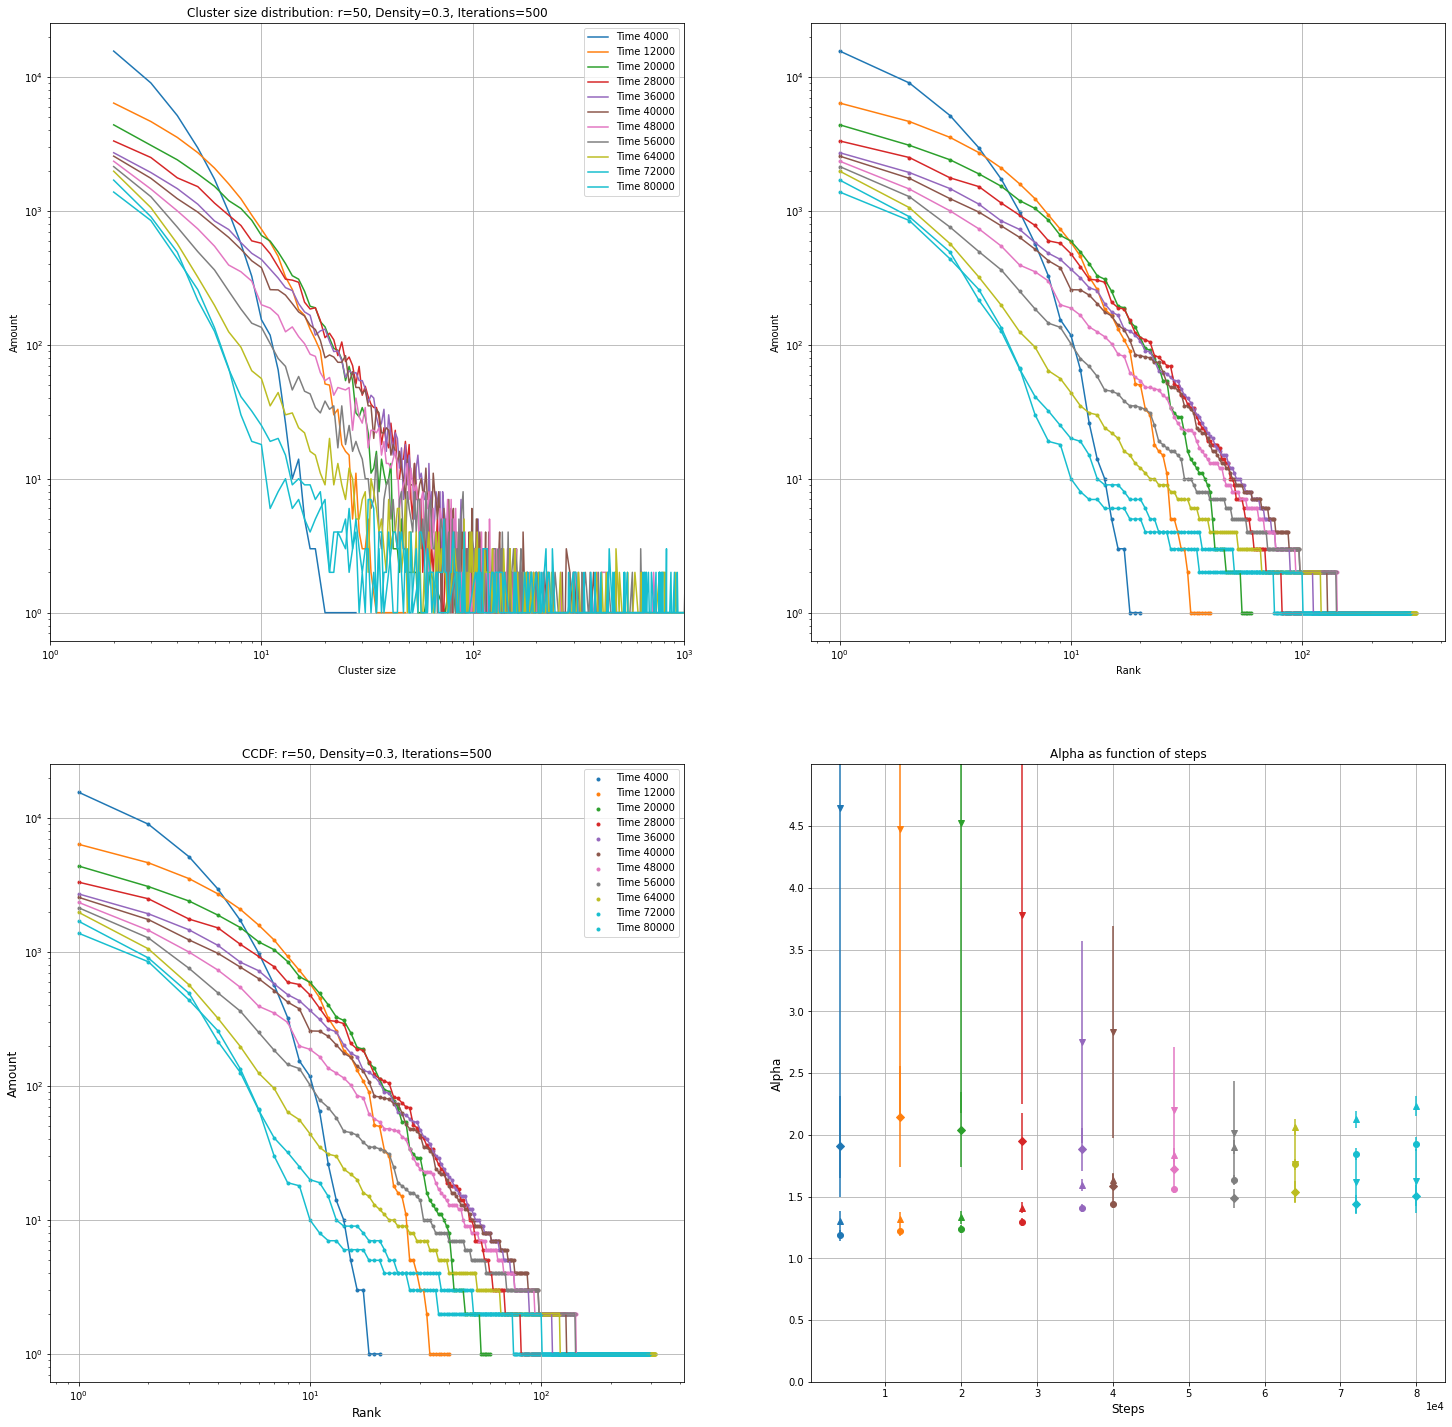

In [ ]:

fig, ax = plt.subplots(2, 2, figsize=(25, 25))
name = [4000, 20000, 36000, 48000, 64000, 80000]



def plot_rank_frequency(amount, xmin, xmax):
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    return ccdf
    
def calc_alpha(amount, size, xmin, xmax):
    alpha = 1 + len(amount[xmin:xmax]) / (np.sum(np.log(amount[xmin:xmax]/ (np.min(amount[xmin:xmax]) - 0.5))))
    xmin2 = size[xmin]
    invSigma = np.sqrt(len(amount[xmin:xmax]) * ( (zeta(alpha, xmin2, 2)/zeta(alpha, xmin2)) - (zeta(alpha, xmin2, 1)/zeta(alpha,xmin2))**2 ))
    sigma = 1/invSigma
    return [alpha, sigma]
upper_lim = [11] * len(name)
lower_lim = [1] * len(name)


upper_lim2 = [-1] * len(name)

ax[0, 0].grid()
ax[0, 1].grid()
ax[1,0].grid()
ax[1,1].grid()


ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')

cmap = plt.get_cmap('tab10')
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/Choice_true/0.05/r50_2D_c0.05000_100_{}_0.300000_1.txt".format(name[i]), skiprows=2, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 0].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))

    
    lower_lim2 =  [-int(0.6 * len(amount))] * len(name)
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    ax[0, 1].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
    ax[0, 1].plot(ranks, ccdf, c=cmap(i))

    ax[1, 0].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
    ax[1, 0].plot(ranks, ccdf, c=cmap(i))

    lower_lim = 0
    upper_lim = int(10**( (np.log10(len(amount))/3)))
    lower_lim2 = int(10**( 2*(np.log10(len(amount))/3)))
    upper_lim2 = -1
    print(int(10**( (np.log10(len(amount))/3))))

    out = calc_alpha(amount, size, lower_lim, upper_lim)
    out2 = calc_alpha(amount, size, upper_lim, lower_lim2)
    out3 = calc_alpha(amount, size, lower_lim2, upper_lim2)
    out4 = calc_alpha(amount, size, 0, -1)
    ax[1,1].errorbar(name[i], out[0], yerr=out[1], fmt='v', c=cmap(i))
    ax[1,1].errorbar(name[i], out2[0], yerr=out2[1], fmt='D', c=cmap(i))
    ax[1,1].errorbar(name[i], out3[0], yerr=out3[1], fmt='^', c=cmap(i))
    ax[1,1].errorbar(name[i], out4[0], yerr=out4[1], fmt='o', c=cmap(i))
    ax[1,1].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    

ax[0,0].set_xlabel("Cluster size")
ax[0,0].set_ylabel("Amount")
ax[0,0].set_title("Cluster size distribution: r=50, Density=0.3, Iterations=500")
ax[0,0].legend()

ax[1,1].set_xlabel("Steps", fontsize=12)
ax[1,1].set_ylabel("Alpha", fontsize=12)

ax[1,1].set_title("Alpha as function of steps", fontsize=12)

ax[0,1].set_xlabel("Rank")
ax[0,1].set_ylabel("Amount")

ax[0,0].set_xlim(1, 1000)

ax[1,0].set_xlabel("Rank", fontsize=12)
ax[1,0].set_ylabel("Amount", fontsize=12)
ax[1,0].set_title("CCDF: r=50, Density=0.3, Iterations=500", fontsize=12)
ax[1, 0].legend()


ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')

ax[1,1].set_ylim(0, 5)


# Set the y-ticks to appear every 0.5 units
ax[1, 1].set_yticks(np.arange(0, 5, 0.5))  # replace 5 with max y-value



/tmp/ipykernel_5675/1897661666.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[0, 1].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
/tmp/ipykernel_5675/1897661666.py:46: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[1, 0].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')


2
3
3
4
4
5
5
6
6
6
6


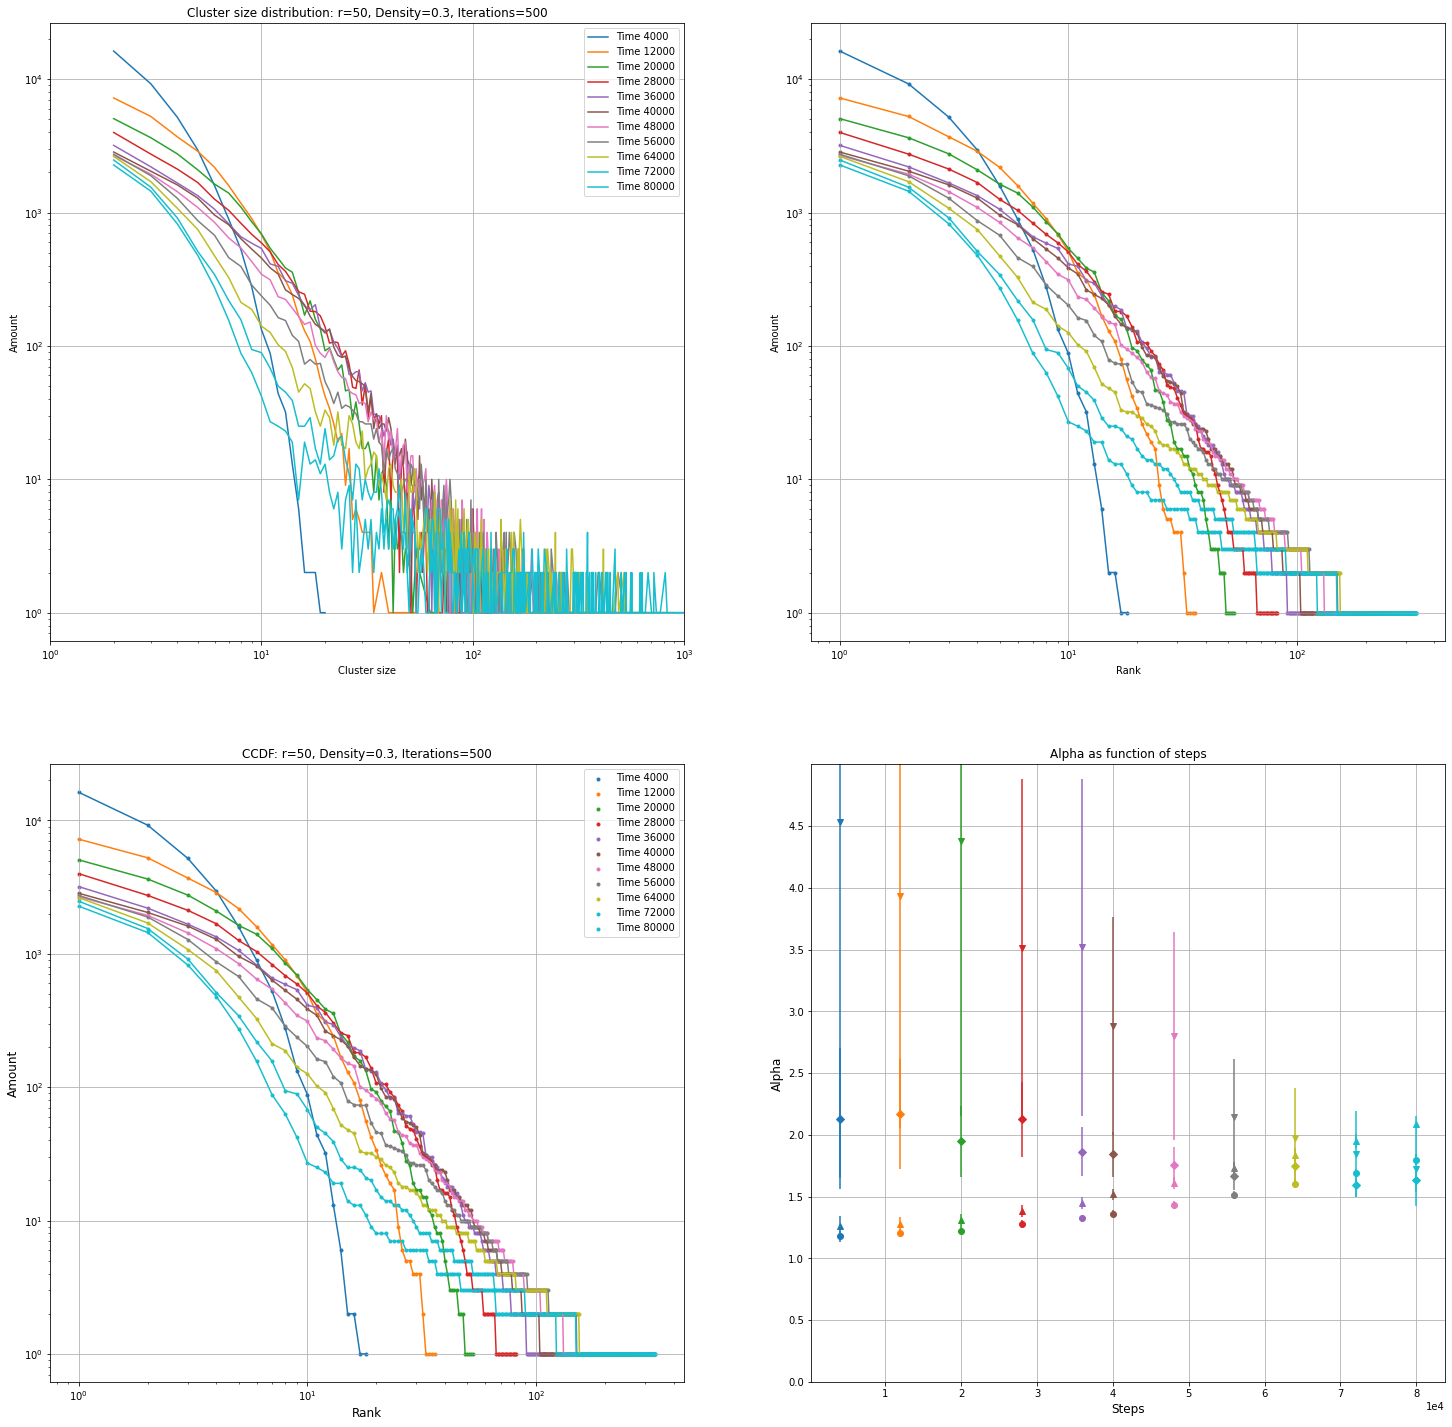

In [ ]:

fig, ax = plt.subplots(2, 2, figsize=(25, 25))
name =[4000, 20000, 36000, 48000, 64000, 80000]



def plot_rank_frequency(amount, xmin, xmax):
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    return ccdf
    
def calc_alpha(amount, size, xmin, xmax):
    alpha = 1 + len(amount[xmin:xmax]) / (np.sum(np.log(amount[xmin:xmax]/ (np.min(amount[xmin:xmax]) - 0.5))))
    xmin2 = size[xmin]
    invSigma = np.sqrt(len(amount[xmin:xmax]) * ( (zeta(alpha, xmin2, 2)/zeta(alpha, xmin2)) - (zeta(alpha, xmin2, 1)/zeta(alpha,xmin2))**2 ))
    sigma = 1/invSigma
    return [alpha, sigma]
upper_lim = [11] * len(name)
lower_lim = [1] * len(name)


upper_lim2 = [-1] * len(name)

ax[0, 0].grid()
ax[0, 1].grid()
ax[1,0].grid()
ax[1,1].grid()


ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')

cmap = plt.get_cmap('tab10')
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/Choice_true/0.075/r50_2D_c0.07500_100_{}_0.300000_1.txt".format(name[i]), skiprows=2, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 0].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))

    
    lower_lim2 =  [-int(0.6 * len(amount))] * len(name)
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    ax[0, 1].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
    ax[0, 1].plot(ranks, ccdf, c=cmap(i))

    ax[1, 0].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
    ax[1, 0].plot(ranks, ccdf, c=cmap(i))

    lower_lim = 0
    upper_lim = int(10**( (np.log10(len(amount))/3)))
    lower_lim2 = int(10**( 2*(np.log10(len(amount))/3)))
    upper_lim2 = -1
    print(int(10**( (np.log10(len(amount))/3))))

    out = calc_alpha(amount, size, lower_lim, upper_lim)
    out2 = calc_alpha(amount, size, upper_lim, lower_lim2)
    out3 = calc_alpha(amount, size, lower_lim2, upper_lim2)
    out4 = calc_alpha(amount, size, 0, -1)
    ax[1,1].errorbar(name[i], out[0], yerr=out[1], fmt='v', c=cmap(i))
    ax[1,1].errorbar(name[i], out2[0], yerr=out2[1], fmt='D', c=cmap(i))
    ax[1,1].errorbar(name[i], out3[0], yerr=out3[1], fmt='^', c=cmap(i))
    ax[1,1].errorbar(name[i], out4[0], yerr=out4[1], fmt='o', c=cmap(i))
    ax[1,1].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    

ax[0,0].set_xlabel("Cluster size")
ax[0,0].set_ylabel("Amount")
ax[0,0].set_title("Cluster size distribution: r=50, Density=0.3, Iterations=500")
ax[0,0].legend()

ax[1,1].set_xlabel("Steps", fontsize=12)
ax[1,1].set_ylabel("Alpha", fontsize=12)

ax[1,1].set_title("Alpha as function of steps", fontsize=12)

ax[0,1].set_xlabel("Rank")
ax[0,1].set_ylabel("Amount")

ax[0,0].set_xlim(1, 1000)

ax[1,0].set_xlabel("Rank", fontsize=12)
ax[1,0].set_ylabel("Amount", fontsize=12)
ax[1,0].set_title("CCDF: r=50, Density=0.3, Iterations=500", fontsize=12)
ax[1, 0].legend()


ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')

ax[1,1].set_ylim(0, 5)


# Set the y-ticks to appear every 0.5 units
ax[1, 1].set_yticks(np.arange(0, 5, 0.5))  # replace 5 with max y-value



2
3
4
5
6
6


/tmp/ipykernel_5287/1890179063.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[0, 1].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
/tmp/ipykernel_5287/1890179063.py:46: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[1, 0].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')


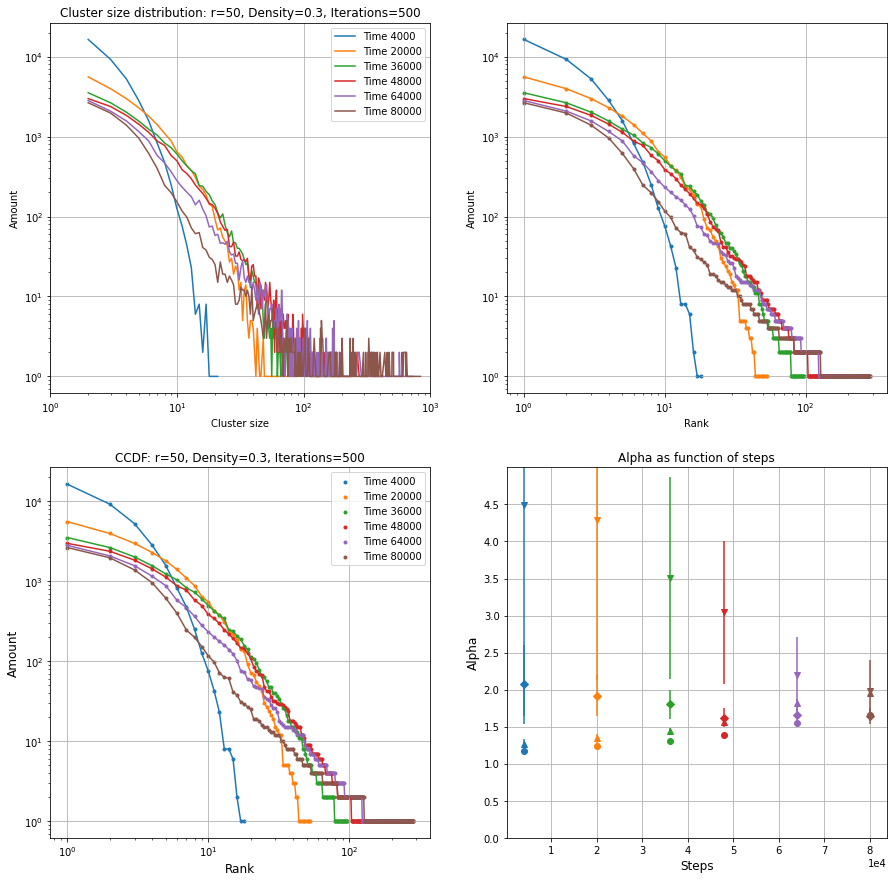

In [14]:

fig, ax = plt.subplots(2, 2, figsize=(15, 15))
name = [4000, 20000, 36000, 48000, 64000, 80000]



def plot_rank_frequency(amount, xmin, xmax):
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    return ccdf
    
def calc_alpha(amount, size, xmin, xmax):
    alpha = 1 + len(amount[xmin:xmax]) / (np.sum(np.log(amount[xmin:xmax]/ (np.min(amount[xmin:xmax]) - 0.5))))
    xmin2 = size[xmin]
    invSigma = np.sqrt(len(amount[xmin:xmax]) * ( (zeta(alpha, xmin2, 2)/zeta(alpha, xmin2)) - (zeta(alpha, xmin2, 1)/zeta(alpha,xmin2))**2 ))
    sigma = 1/invSigma
    return [alpha, sigma]
upper_lim = [11] * len(name)
lower_lim = [1] * len(name)


upper_lim2 = [-1] * len(name)

ax[0, 0].grid()
ax[0, 1].grid()
ax[1,0].grid()
ax[1,1].grid()


ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')

cmap = plt.get_cmap('tab10')
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/Choice_true/0.1/r50_2D_c0.10000_100_{}_0.300000_1.txt".format(name[i]), skiprows=2, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 0].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))

    
    lower_lim2 =  [-int(0.6 * len(amount))] * len(name)
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    ax[0, 1].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
    ax[0, 1].plot(ranks, ccdf, c=cmap(i))

    ax[1, 0].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
    ax[1, 0].plot(ranks, ccdf, c=cmap(i))

    lower_lim = 0
    upper_lim = int(10**( (np.log10(len(amount))/3)))
    lower_lim2 = int(10**( 2*(np.log10(len(amount))/3)))
    upper_lim2 = -1
    print(int(10**( (np.log10(len(amount))/3))))

    out = calc_alpha(amount, size, lower_lim, upper_lim)
    out2 = calc_alpha(amount, size, upper_lim, lower_lim2)
    out3 = calc_alpha(amount, size, lower_lim2, upper_lim2)
    out4 = calc_alpha(amount, size, 0, -1)
    ax[1,1].errorbar(name[i], out[0], yerr=out[1], fmt='v', c=cmap(i))
    ax[1,1].errorbar(name[i], out2[0], yerr=out2[1], fmt='D', c=cmap(i))
    ax[1,1].errorbar(name[i], out3[0], yerr=out3[1], fmt='^', c=cmap(i))
    ax[1,1].errorbar(name[i], out4[0], yerr=out4[1], fmt='o', c=cmap(i))
    ax[1,1].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    

ax[0,0].set_xlabel("Cluster size")
ax[0,0].set_ylabel("Amount")
ax[0,0].set_title("Cluster size distribution: r=50, Density=0.3, Iterations=500")
ax[0,0].legend()

ax[1,1].set_xlabel("Steps", fontsize=12)
ax[1,1].set_ylabel("Alpha", fontsize=12)

ax[1,1].set_title("Alpha as function of steps", fontsize=12)

ax[0,1].set_xlabel("Rank")
ax[0,1].set_ylabel("Amount")

ax[0,0].set_xlim(1, 1000)

ax[1,0].set_xlabel("Rank", fontsize=12)
ax[1,0].set_ylabel("Amount", fontsize=12)
ax[1,0].set_title("CCDF: r=50, Density=0.3, Iterations=500", fontsize=12)
ax[1, 0].legend()


ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')

ax[1,1].set_ylim(0, 5)


# Set the y-ticks to appear every 0.5 units
ax[1, 1].set_yticks(np.arange(0, 5, 0.5))  # replace 5 with max y-value



3
4
5
6
6
3
4
5
6
6
3
5
6
6
6
4
6
6
6
6
4
6
6
6
6
4
6
6
6
6


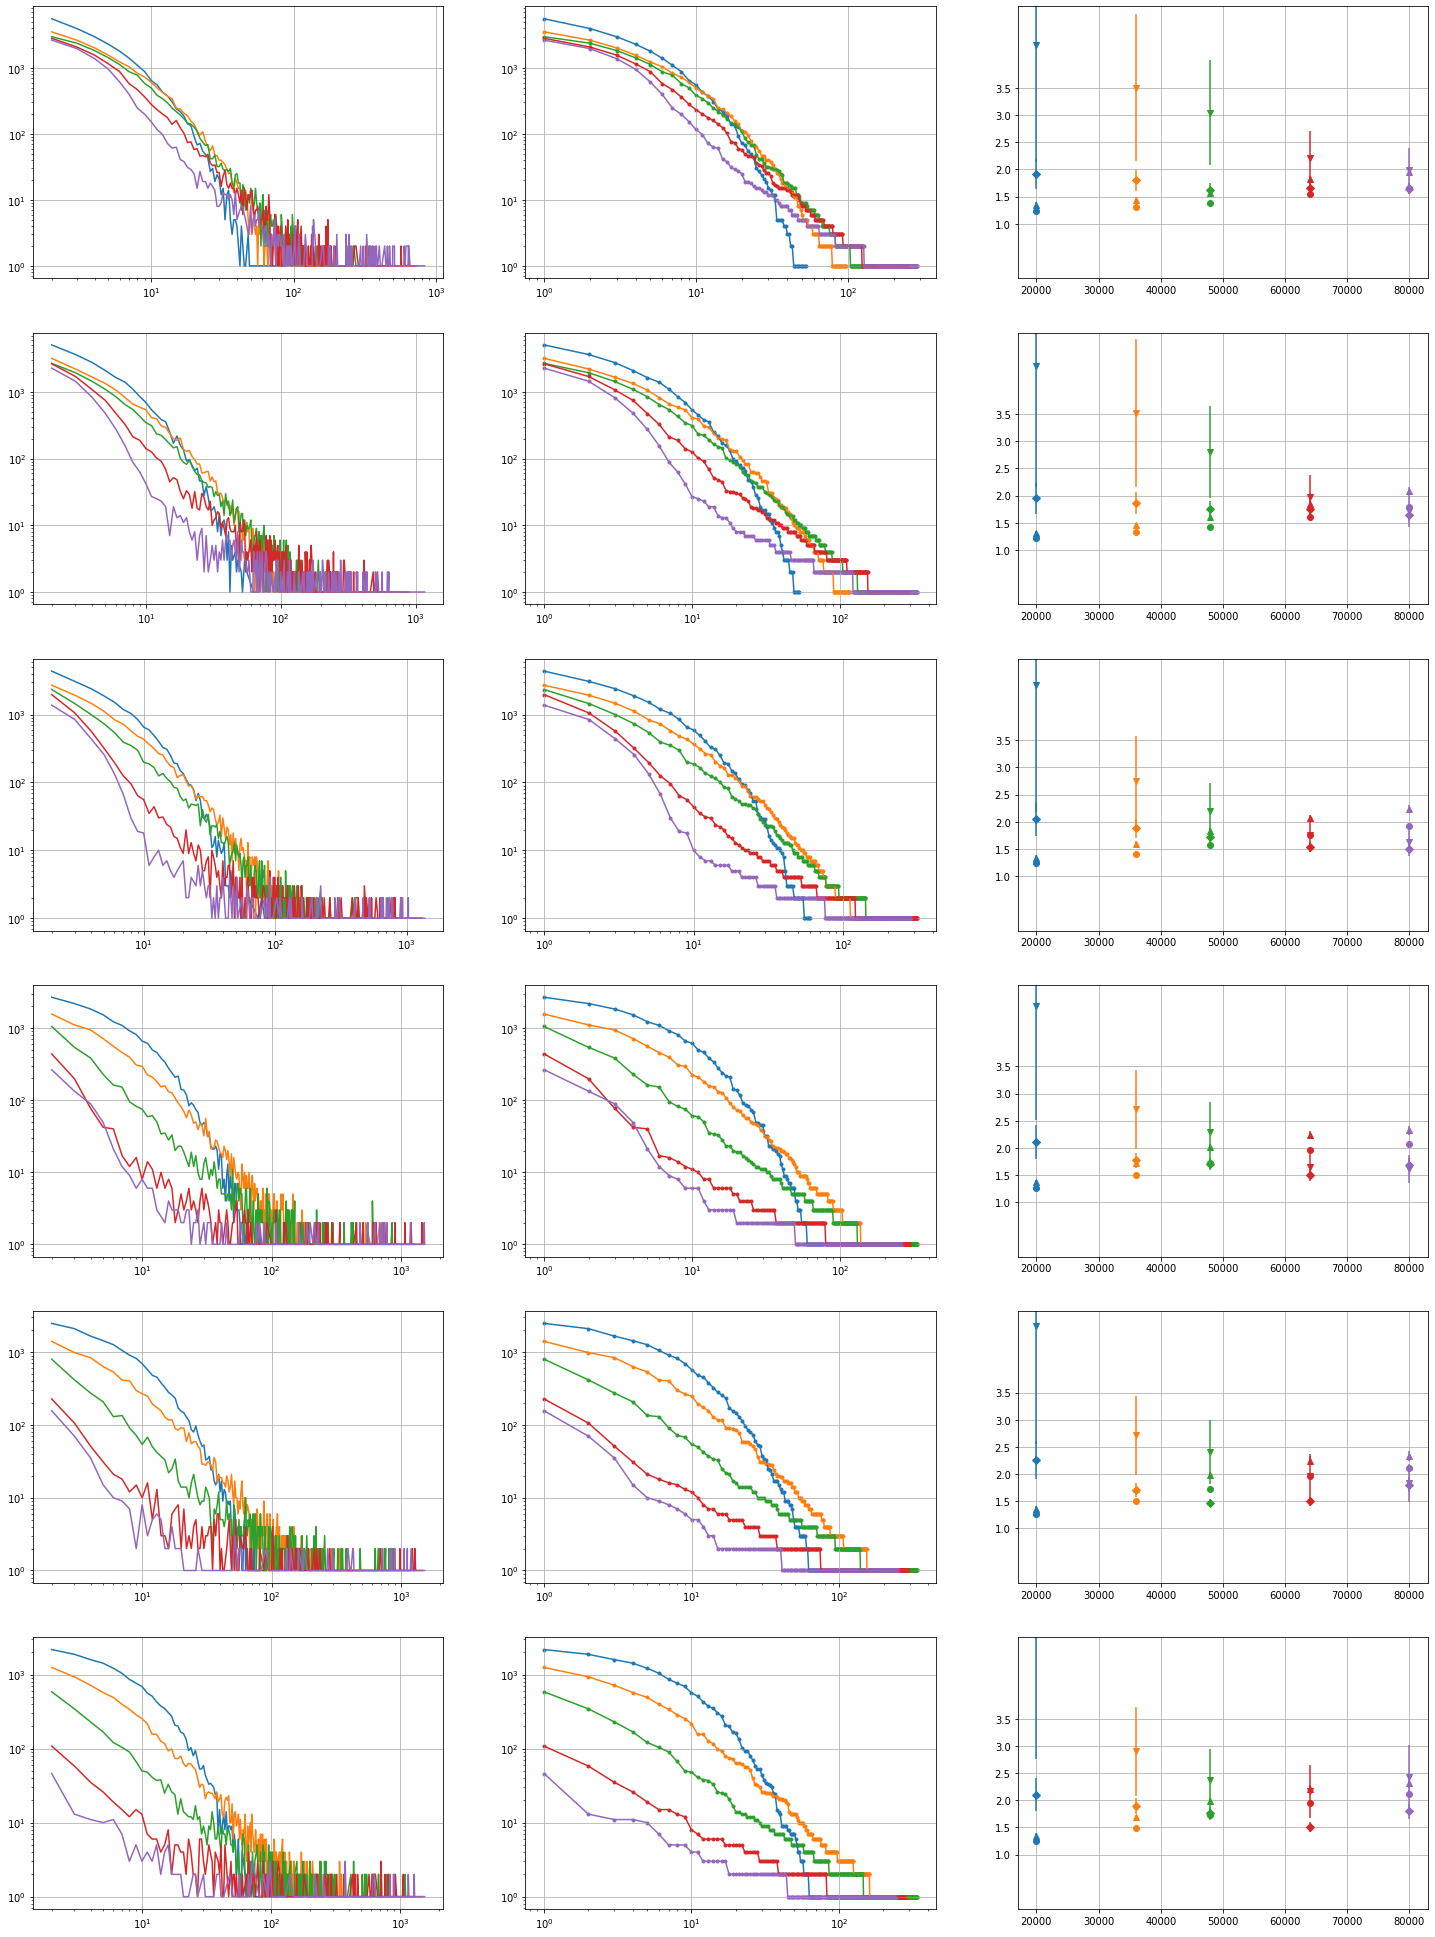

In [11]:
fig, ax = plt.subplots(6,3, figsize=(25, 35))



time = [20000, 36000, 48000, 64000, 80000]
name = [0.1, 0.075, 0.05,  0.01, 0.005, 0.001]
name2= ["0.10000", "0.07500", "0.05000", "0.01000" , "0.00500", "0.00"]
cmap = plt.get_cmap('tab10')

for i in range(len(name)):
    for k, j in enumerate(time):
        
        size, amount = np.loadtxt("Pref_attach/Choice_true/{}/r50_2D_c{}_100_{}_0.300000_1.txt".format(name[i], name2[i], j), skiprows=2, unpack=True)
        size = size[1:]
        amount = amount[1:]
        ax[i, 0].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(k))


        lower_lim2 =  [-int(0.6 * len(amount))] * len(name)
        ccdf = np.sort(amount)[::-1]
        ranks = np.arange(1, len(ccdf)+1)
        ax[i, 1].scatter(ranks, ccdf, label="Time {}".format(j), marker='.')
        ax[i, 1].plot(ranks, ccdf)
        lower_lim = 0
        upper_lim = int(10**( (np.log10(len(amount))/3)))
        lower_lim2 = int(10**( 2*(np.log10(len(amount))/3)))
        upper_lim2 = -1
        print(int(10**( (np.log10(len(amount))/3))))

        out = calc_alpha(amount, size, lower_lim, upper_lim)
        out2 = calc_alpha(amount, size, upper_lim, lower_lim2)
        out3 = calc_alpha(amount, size, lower_lim2, upper_lim2)
        out4 = calc_alpha(amount, size, 0, -1)
        ax[i,2].errorbar(j, out[0], yerr=out[1], fmt='v', c=cmap(k))
        ax[i,2].errorbar(j, out2[0], yerr=out2[1], fmt='D', c=cmap(k))
        ax[i,2].errorbar(j, out3[0], yerr=out3[1], fmt='^', c=cmap(k))
        ax[i,2].errorbar(j, out4[0], yerr=out4[1], fmt='o', c=cmap(k))
        
        ax[i,0].set_xscale('log')
        ax[i,0].set_yscale('log')
        ax[i,1].set_xscale('log')
        ax[i,1].set_yscale('log')   
        ax[i, 2].set_yticks(np.arange(1, 4, 0.5))
        ax[i, 2].set_ylim(0, 5) 
        
ax[0,0].grid()
ax[0,1].grid()
ax[0,2].grid()
ax[1,0].grid()
ax[1,1].grid()
ax[1,2].grid()
ax[2,0].grid()
ax[2,1].grid()
ax[2,2].grid()
ax[3,0].grid()
ax[3,1].grid()
ax[3,2].grid()
ax[4,0].grid()
ax[4,1].grid()
ax[4,2].grid()
ax[5,0].grid()
ax[5,1].grid()
ax[5,2].grid()


/tmp/ipykernel_5287/620462631.py:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[1].scatter(ranks, ccdf, label="Choice {}".format(name[i]), c=cmap(i), marker='.')


5
6
6
6
6
6


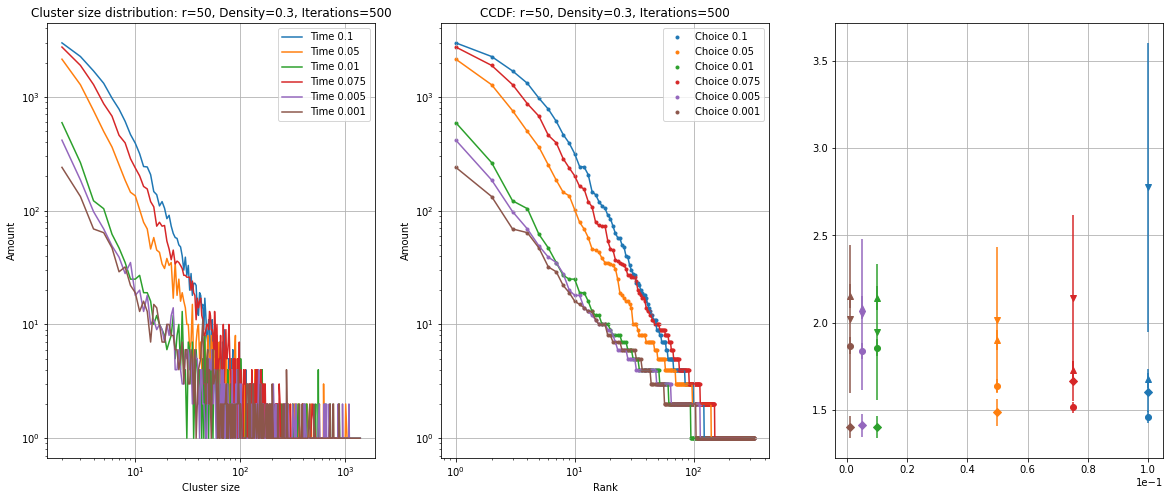

In [15]:
fig, ax = plt.subplots(1,3, figsize=(20,8))

name = [0.1, 0.05, 0.01, 0.075, 0.005, 0.001]
name2= ["0.10000", "0.05000", "0.01000", "0.07500", "0.00500", "0.00"]

for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/Choice_true/{0}/r50_2D_c{1}_100_56000_0.300000_1.txt".format(name[i], name2[i]), skiprows=2, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))

    
    lower_lim2 =  [-int(0.6 * len(amount))] * len(name)
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    ax[1].scatter(ranks, ccdf, label="Choice {}".format(name[i]), c=cmap(i), marker='.')
    ax[1].plot(ranks, ccdf, c=cmap(i))

    lower_lim = 0
    upper_lim = int(10**( (np.log10(len(amount))/3)))
    lower_lim2 = int(10**( 2*(np.log10(len(amount))/3)))
    upper_lim2 = -1
    print(int(10**( (np.log10(len(amount))/3))))

    out = calc_alpha(amount, size, lower_lim, upper_lim)
    out2 = calc_alpha(amount, size, upper_lim, lower_lim2)
    out3 = calc_alpha(amount, size, lower_lim2, upper_lim2)
    out4 = calc_alpha(amount, size, 0, -1)
    ax[2].errorbar(name[i], out[0], yerr=out[1], fmt='v', c=cmap(i))
    ax[2].errorbar(name[i], out2[0], yerr=out2[1], fmt='D', c=cmap(i))
    ax[2].errorbar(name[i], out3[0], yerr=out3[1], fmt='^', c=cmap(i))
    ax[2].errorbar(name[i], out4[0], yerr=out4[1], fmt='o', c=cmap(i))
    ax[2].ticklabel_format(axis="x", style="sci", scilimits=(0,0))

ax[0].set_xlabel("Cluster size")
ax[0].set_ylabel("Amount")
ax[0].set_title("Cluster size distribution: r=50, Density=0.3, Iterations=500")
ax[0].legend()
ax[0].grid()
ax[1].grid()

ax[1].set_xlabel("Rank")
ax[1].set_ylabel("Amount")
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_title("CCDF: r=50, Density=0.3, Iterations=500")
ax[1].legend()
ax[2].grid()

